<a href="https://colab.research.google.com/github/vanshikaishpunyani/Projects/blob/main/AUTOMOBILE_PRICE_VALUATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***AUTOMOBILE PRICE VALUATION***

Data - from ***kaggle***

with *6019 records* and *14 attributes*

***DATA EXPLORATION***

***Importing Libraries***

In [564]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)

***importing data***

In [565]:
df = pd.read_csv('/content/train-data.csv')
df.sample(10)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1209,1209,Audi Q7 35 TDI Quattro Premium Plus,Mumbai,2015,65938,Diesel,Automatic,Second,12.07 kmpl,2967 CC,241.4 bhp,7.0,NaN,38.00
1345,1345,Maruti Baleno Vxi,Pune,2005,70000,Petrol,Manual,First,0.0 kmpl,1590 CC,null bhp,5.0,NaN,1.30
1902,1902,Toyota Fortuner 2.8 2WD AT,Ahmedabad,2017,15000,Diesel,Automatic,First,12.9 kmpl,2755 CC,174.5 bhp,7.0,34.45 Lakh,30.00
4865,4865,Honda Amaze S i-Dtech,Kochi,2016,46983,Diesel,Manual,First,25.8 kmpl,1498 CC,98.6 bhp,5.0,NaN,5.77
2791,2791,Renault Fluence Diesel E4,Delhi,2012,87510,Diesel,Manual,First,21.8 kmpl,1461 CC,78 bhp,5.0,NaN,3.49
2060,2060,Audi A4 2.0 TDI 177 Bhp Technology Edition,Bangalore,2014,24000,Diesel,Automatic,First,17.11 kmpl,1968 CC,174.33 bhp,5.0,NaN,25.00
3352,3352,Renault KWID RXT,Jaipur,2016,12500,Petrol,Manual,First,25.17 kmpl,799 CC,53.3 bhp,5.0,NaN,3.00
306,306,Mercedes-Benz GLA Class 200 CDI SPORT,Delhi,2015,48000,Diesel,Automatic,First,17.9 kmpl,2143 CC,136 bhp,5.0,NaN,20.26
4756,4756,Audi A6 2.7 TDI,Kolkata,2010,35010,Diesel,Automatic,First,12.4 kmpl,2698 CC,179.5 bhp,5.0,NaN,11.50
1377,1377,Honda City i DTec V,Coimbatore,2017,73003,Diesel,Manual,First,26.0 kmpl,1498 CC,98.6 bhp,5.0,NaN,7.75


***Mileage,Engine,Power and new_price have some units associated with it***

***and null values in new_price column***

In [566]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


***new_price,power,engine,mileage all must be in float or int***


In [567]:
df.nunique()

Unnamed: 0           6019
Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
New_Price             540
Price                1373
dtype: int64

In [568]:
print(df['Name'].str.split().str[0].value_counts())

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Smart               1
Ambassador          1
Isuzu               1
Bentley             1
Lamborghini         1
Name: Name, dtype: int64


In [569]:
np.sort(df['Year'].unique())


array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [570]:
df['Location'].value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

In [571]:
df['Fuel_Type'].value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [572]:
print(np.sort(df['Transmission'].unique()))

['Automatic' 'Manual']


In [573]:
print(np.sort(df['Owner_Type'].unique()))

['First' 'Fourth & Above' 'Second' 'Third']


In [574]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [575]:
df.describe(include='object')

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,New_Price
count,6019,6019,6019,6019,6019,6017,5983,5983,824
unique,1876,11,5,2,4,442,146,372,540
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,95.13 Lakh
freq,49,790,3205,4299,4929,172,606,235,6


***DATA CLEANING***



1.   ***With name we'll get 1875 dummies ,that's something hard to implement***
2.   New price has a lot of nan values moreover it is generating multicollinearity in the data set



In [576]:
df.drop(df.columns[[0,1,-2]],axis=1,inplace=True)

In [577]:
df.dropna(inplace=True)

In [578]:
df = df[~(df['Seats']==0.0)]
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [579]:
df.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

***DATA PREPROCESSING & FEATURE SELECTION***

***Data division***

In [580]:
Y = df.iloc[:,-1]
X_categorical = df[df.columns[[0,1,3,4,5,9]]]
X_numerical = df[df.columns[[2,6,7,8]]]

In [581]:
 df[df.columns[[0,1,3,4,5,9]]]

,Location,Year,Fuel_Type,Transmission,Owner_Type,Seats
0,Mumbai,2010,CNG,Manual,First,5.0
1,Pune,2015,Diesel,Manual,First,5.0
2,Chennai,2011,Petrol,Manual,First,5.0
3,Chennai,2012,Diesel,Manual,First,7.0
4,Coimbatore,2013,Diesel,Automatic,Second,5.0
...,...,...,...,...,...,...
6014,Delhi,2014,Diesel,Manual,First,5.0
6015,Jaipur,2015,Diesel,Manual,First,5.0
6016,Jaipur,2012,Diesel,Manual,Second,8.0
6017,Kolkata,2013,Petrol,Manual,First,5.0


***Encoding numerical features***

In [582]:
df[df.columns[[2,6,7,8]]]

,Kilometers_Driven,Mileage,Engine,Power
0,72000,26.6 km/kg,998 CC,58.16 bhp
1,41000,19.67 kmpl,1582 CC,126.2 bhp
2,46000,18.2 kmpl,1199 CC,88.7 bhp
3,87000,20.77 kmpl,1248 CC,88.76 bhp
4,40670,15.2 kmpl,1968 CC,140.8 bhp
...,...,...,...,...
6014,27365,28.4 kmpl,1248 CC,74 bhp
6015,100000,24.4 kmpl,1120 CC,71 bhp
6016,55000,14.0 kmpl,2498 CC,112 bhp
6017,46000,18.9 kmpl,998 CC,67.1 bhp


In [583]:
print(X_numerical['Mileage'].str.split().str[1].value_counts())
print(X_numerical['Power'].str.split().str[1].value_counts())
print(X_numerical['Engine'].str.split().str[1].value_counts())
'''print(X_numerical['New_Price'].str.split().str[1].value_counts())'''


kmpl     5908
km/kg      66
Name: Mileage, dtype: int64
bhp    5974
Name: Power, dtype: int64
CC    5974
Name: Engine, dtype: int64


"print(X_numerical['New_Price'].str.split().str[1].value_counts())"

In [584]:
mil=[]
for i in X_numerical['Mileage']:
  if i.endswith('km/kg') :
    val = i[:-6]
    val = float(val)*1.33
    mil.append(val)
  else:
    val = i[:-5]
    mil.append(float(val))
X_numerical['Mileage']=mil

<ipython-input-584-5692933ce89a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_numerical['Mileage']=mil


In [585]:
'''NP=[]
for i in X_numerical['New_Price']:
  if i.endswith('Cr') :
    val = i[:-2]
    val = float(val)*100
    NP.append(float(val))
  else:
    val = i[:-4]
    NP.append(float(val))
X_numerical['New_Price']=NP'''

"NP=[]\nfor i in X_numerical['New_Price']:\n  if i.endswith('Cr') :\n    val = i[:-2]\n    val = float(val)*100\n    NP.append(float(val))\n  else:\n    val = i[:-4]\n    NP.append(float(val))\nX_numerical['New_Price']=NP"

In [586]:
X_numerical['Power'] = X_numerical['Power'].str.split().str[0]
X_numerical['Engine'] = X_numerical['Engine'].str.split().str[0]

<ipython-input-586-05791cbdfc9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_numerical['Power'] = X_numerical['Power'].str.split().str[0]
<ipython-input-586-05791cbdfc9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_numerical['Engine'] = X_numerical['Engine'].str.split().str[0]


In [587]:
X_numerical['Power'] =pd.to_numeric(X_numerical['Power'],errors = 'coerce')
X_numerical['Power'].replace('null', np.nan, inplace=True)
mean_power = X_numerical['Power'].mean()
X_numerical['Power'].fillna(mean_power, inplace=True)



<ipython-input-587-dbb850a88682>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_numerical['Power'] =pd.to_numeric(X_numerical['Power'],errors = 'coerce')
<ipython-input-587-dbb850a88682>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_numerical['Power'].replace('null', np.nan, inplace=True)
<ipython-input-587-dbb850a88682>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X

In [588]:
X_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5974 entries, 0 to 6018
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Kilometers_Driven  5974 non-null   int64  
 1   Mileage            5974 non-null   float64
 2   Engine             5974 non-null   object 
 3   Power              5974 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 233.4+ KB


In [589]:
X_numerical['Engine'] = X_numerical['Engine'].astype(float)

<ipython-input-589-7705b6393554>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_numerical['Engine'] = X_numerical['Engine'].astype(float)


In [590]:
X_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5974 entries, 0 to 6018
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Kilometers_Driven  5974 non-null   int64  
 1   Mileage            5974 non-null   float64
 2   Engine             5974 non-null   float64
 3   Power              5974 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 233.4 KB


***checking Normality Assumption !!***

<ipython-input-591-865d6a35e7ae>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_numerical[col])


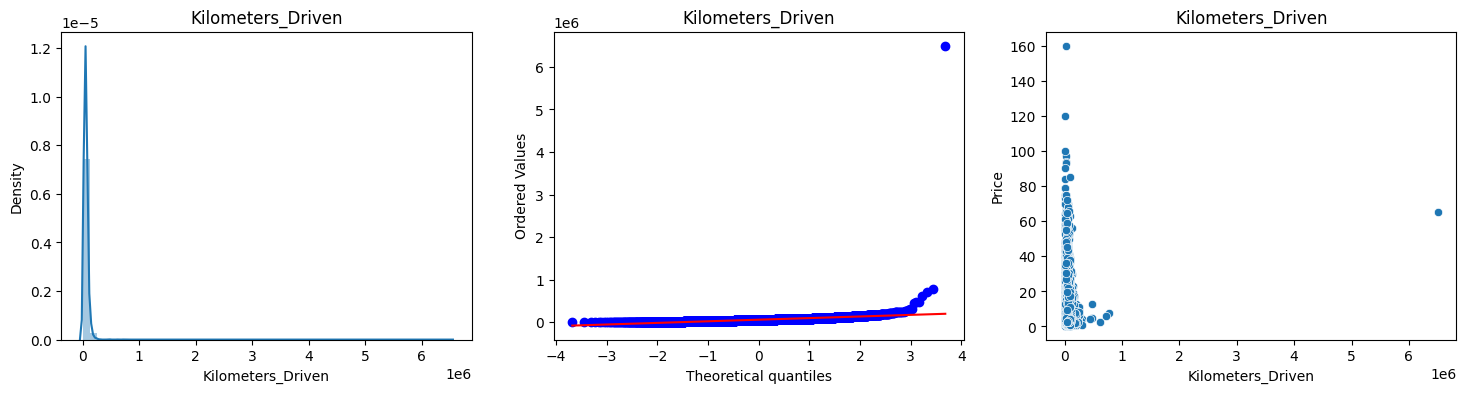

<ipython-input-591-865d6a35e7ae>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_numerical[col])


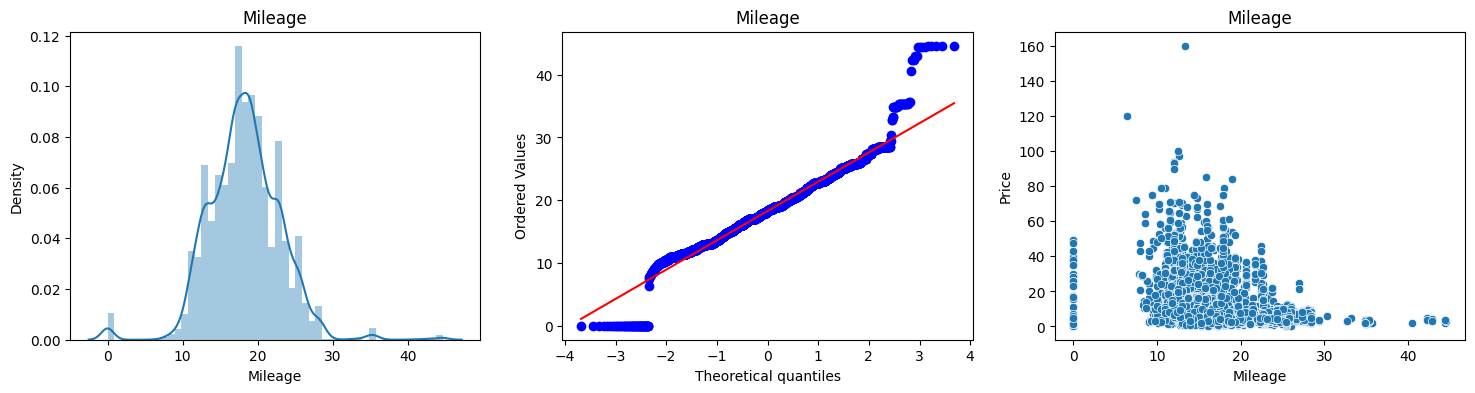

<ipython-input-591-865d6a35e7ae>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_numerical[col])


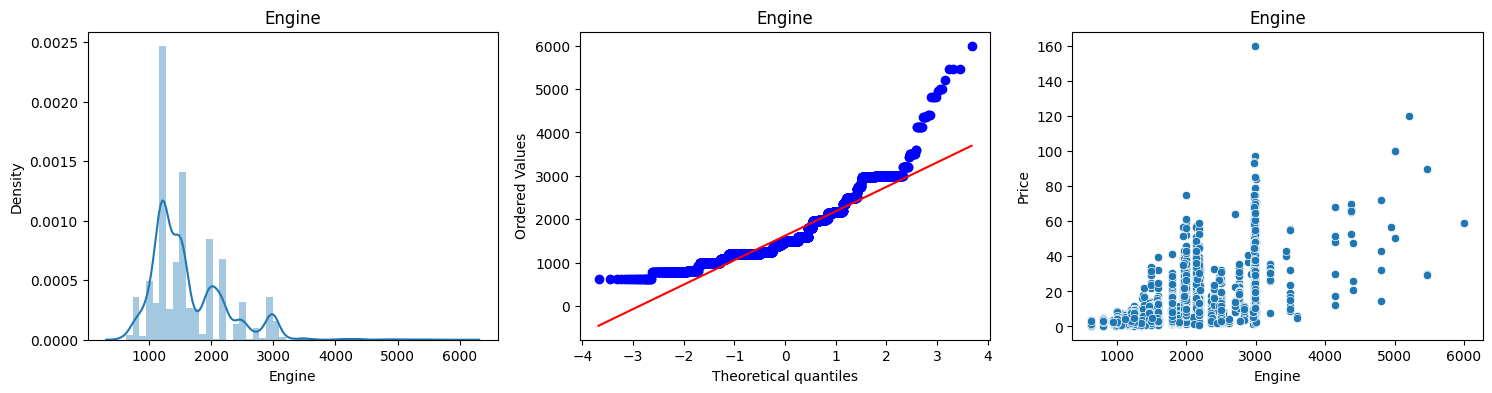

<ipython-input-591-865d6a35e7ae>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_numerical[col])


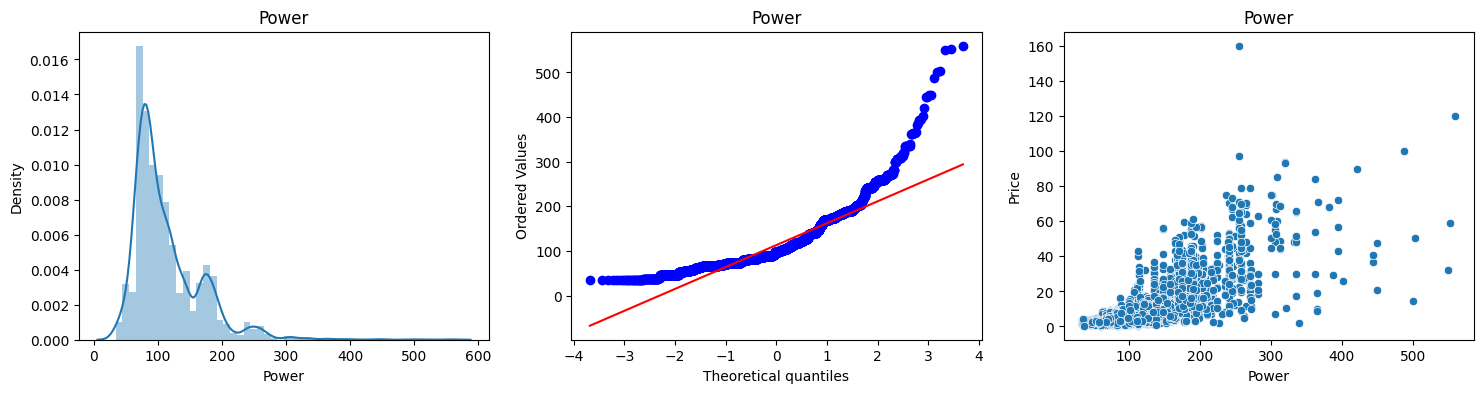

In [591]:
for col in X_numerical.columns:
    plt.figure(figsize=(18,4))
    plt.subplot(131)
    sns.distplot(X_numerical[col])
    plt.title(col)

    plt.subplot(132)
    stats.probplot(X_numerical[col],dist ='norm',plot = plt)
    plt.title(col)

    plt.subplot(133)
    sns.scatterplot(x=X_numerical[col],y=Y)
    plt.title(col)

    plt.show()

as specially power and engine are non-normally distributed
therefore we can apply scaling and transformation or both

In [592]:
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer

In [593]:
yj = PowerTransformer(method = 'yeo-johnson')

In [594]:
X_numerical = yj.fit_transform(X_numerical)
X_numerical=pd.DataFrame(X_numerical,columns=['Kilometers_Driven','Mileage','Engine','Power'])
'''X_numerical=pd.DataFrame(X_numerical,columns=['Kilometers_Driven','Mileage','Engine','Power','New_Price'])'''

"X_numerical=pd.DataFrame(X_numerical,columns=['Kilometers_Driven','Mileage','Engine','Power','New_Price'])"

In [595]:
X_numerical

,Kilometers_Driven,Mileage,Engine,Power
0,0.577039,3.684683,-1.334132,-1.502030
1,-0.293844,0.287667,0.180559,0.546528
2,-0.126428,-0.023267,-0.693171,-0.315888
3,0.900581,0.521273,-0.560119,-0.314127
4,-0.305409,-0.652981,0.796269,0.792639
...,...,...,...,...
5969,-0.842674,2.160800,-0.560119,-0.803418
5970,1.149405,1.297359,-0.925139,-0.919257
5971,0.144036,-0.902853,1.403394,0.266783
5972,-0.126428,0.124614,-1.334132,-1.080161


<ipython-input-596-2d0efd73979f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_numerical[col])


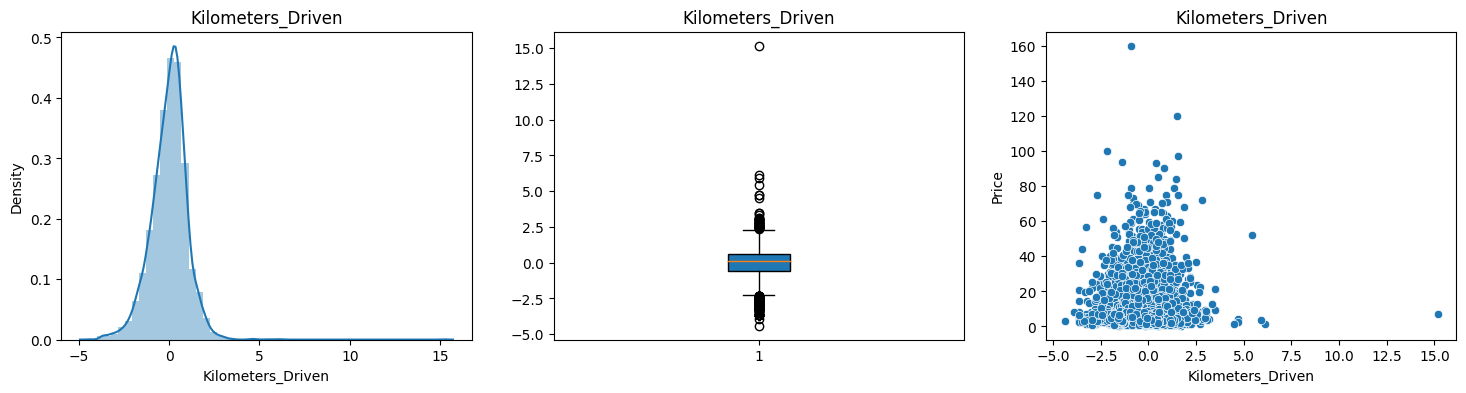

<ipython-input-596-2d0efd73979f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_numerical[col])


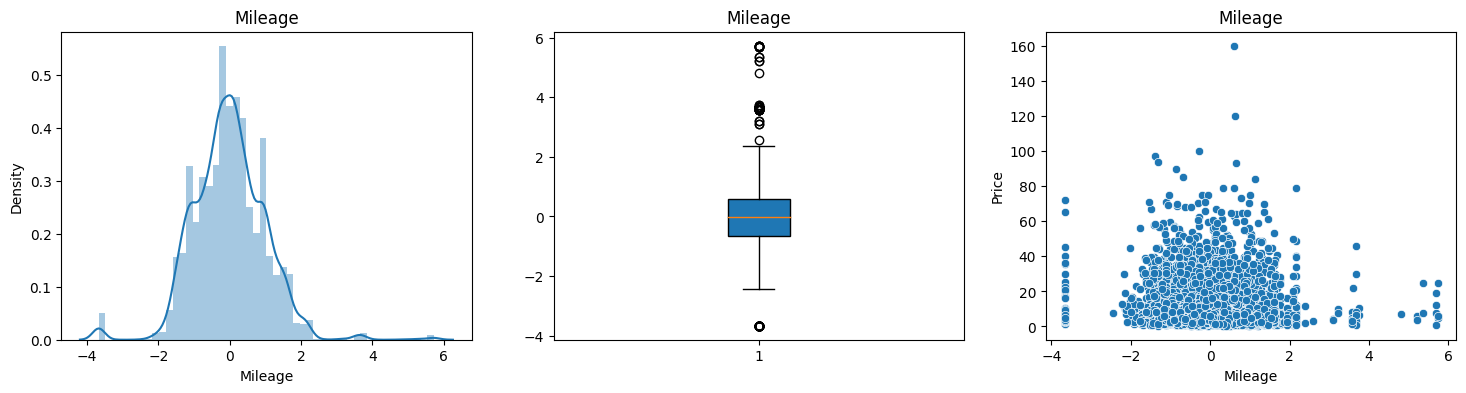

<ipython-input-596-2d0efd73979f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_numerical[col])


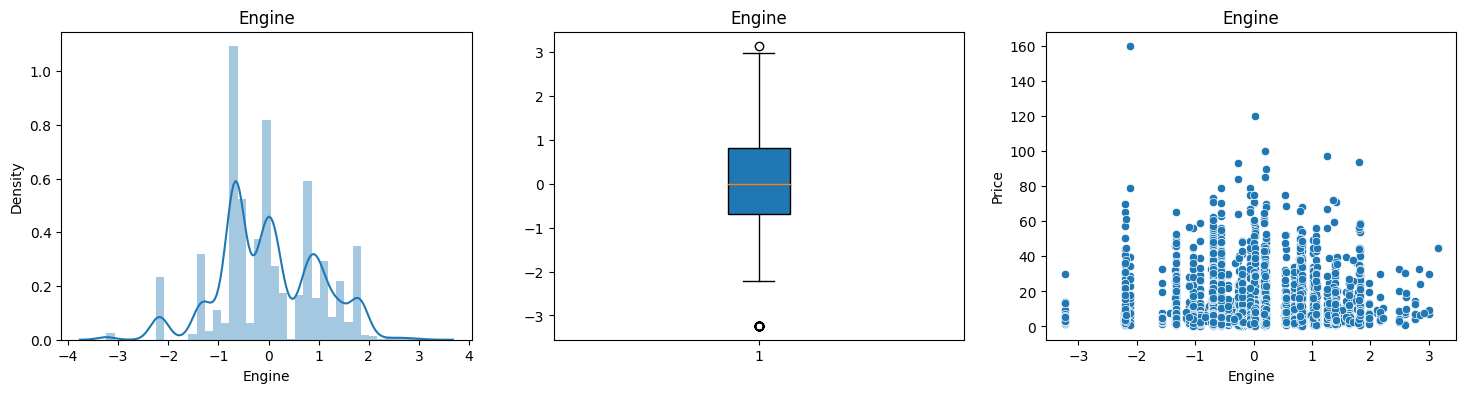

<ipython-input-596-2d0efd73979f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_numerical[col])


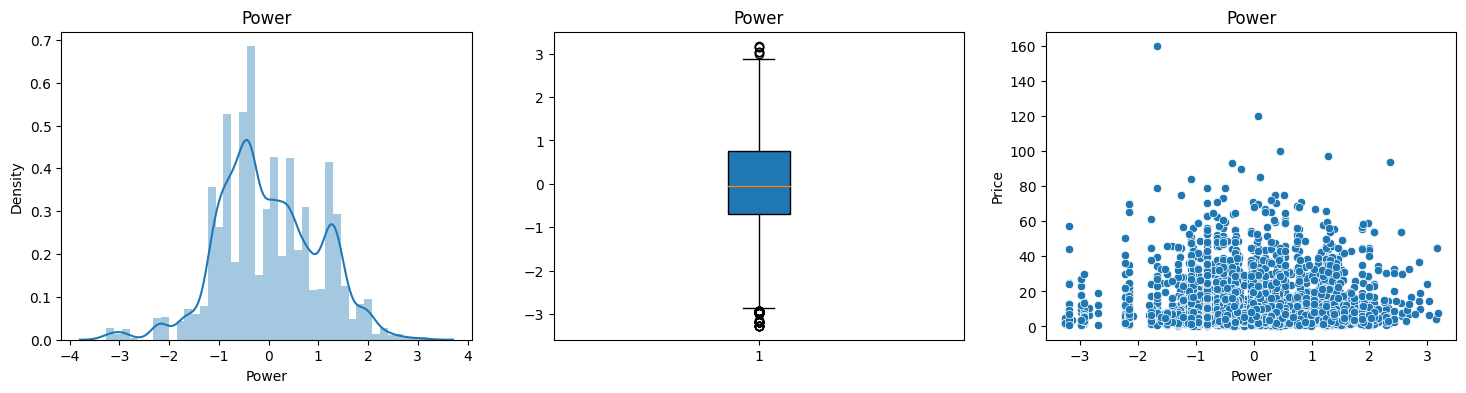

In [596]:
for col in X_numerical.columns:
    plt.figure(figsize=(18,4))
    plt.subplot(131)
    sns.distplot(X_numerical[col])
    plt.title(col)

    plt.subplot(132)
    plt.boxplot(X_numerical[col],patch_artist=True)
    plt.title(col)

    plt.subplot(133)
    sns.scatterplot(x=X_numerical[col],y=Y)
    plt.title(col)

    plt.show()

***Encoding categorical features***

In [597]:
X_categorical

,Location,Year,Fuel_Type,Transmission,Owner_Type,Seats
0,Mumbai,2010,CNG,Manual,First,5.0
1,Pune,2015,Diesel,Manual,First,5.0
2,Chennai,2011,Petrol,Manual,First,5.0
3,Chennai,2012,Diesel,Manual,First,7.0
4,Coimbatore,2013,Diesel,Automatic,Second,5.0
...,...,...,...,...,...,...
6014,Delhi,2014,Diesel,Manual,First,5.0
6015,Jaipur,2015,Diesel,Manual,First,5.0
6016,Jaipur,2012,Diesel,Manual,Second,8.0
6017,Kolkata,2013,Petrol,Manual,First,5.0


In [598]:
X_categorical['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

In [599]:
X_categorical['Fuel_Type'].replace(to_replace=['CNG','LPG'],value='CNG/LPG',inplace=True)


<ipython-input-599-a8737414f9cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_categorical['Fuel_Type'].replace(to_replace=['CNG','LPG'],value='CNG/LPG',inplace=True)


In [600]:
X_categorical_ordinal = X_categorical.drop(X_categorical.columns[[0,2,3]],axis=1,inplace=False)

from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[[*range(1998,2020)],['First','Second','Third','Fourth & Above'],[0.0,2.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0]])
X_categorical_ordinal=oe.fit_transform(X_categorical_ordinal)
print(X_categorical_ordinal)

[[12.  0.  3.]
 [17.  0.  3.]
 [13.  0.  3.]
 ...
 [14.  1.  6.]
 [15.  0.  3.]
 [13.  0.  3.]]


In [601]:
X_categorical_ordinal = pd.DataFrame(X_categorical_ordinal,columns=['Year','Owner_type','Seats'])
print(X_categorical_ordinal)

      Year  Owner_type  Seats
0     12.0         0.0    3.0
1     17.0         0.0    3.0
2     13.0         0.0    3.0
3     14.0         0.0    5.0
4     15.0         1.0    3.0
...    ...         ...    ...
5969  16.0         0.0    3.0
5970  17.0         0.0    3.0
5971  14.0         1.0    6.0
5972  15.0         0.0    3.0
5973  13.0         0.0    3.0

[5974 rows x 3 columns]


In [602]:
X_categorical_nominal = X_categorical.drop(X_categorical.columns[[1,4,5]],axis = 1)
print(X_categorical_nominal)
ohe = OneHotEncoder(categories='auto',drop='first',handle_unknown='ignore')
X_categorical_nominal=ohe.fit_transform(X_categorical_nominal).toarray()
print(X_categorical_nominal)

        Location Fuel_Type Transmission
0         Mumbai   CNG/LPG       Manual
1           Pune    Diesel       Manual
2        Chennai    Petrol       Manual
3        Chennai    Diesel       Manual
4     Coimbatore    Diesel    Automatic
...          ...       ...          ...
6014       Delhi    Diesel       Manual
6015      Jaipur    Diesel       Manual
6016      Jaipur    Diesel       Manual
6017     Kolkata    Petrol       Manual
6018   Hyderabad    Diesel       Manual

[5974 rows x 3 columns]
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 1. 0. ... 0. 1. 1.]
 ...
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 1. 0. 1.]]


In [603]:
labels =ohe.get_feature_names_out([ 'Location', 'Fuel_Type', 'Transmission'])

In [604]:
X_categorical_nominal=pd.DataFrame(X_categorical_nominal,columns=labels)
print(X_categorical_nominal)

      Location_Bangalore  Location_Chennai  Location_Coimbatore  \
0                    0.0               0.0                  0.0   
1                    0.0               0.0                  0.0   
2                    0.0               1.0                  0.0   
3                    0.0               1.0                  0.0   
4                    0.0               0.0                  1.0   
...                  ...               ...                  ...   
5969                 0.0               0.0                  0.0   
5970                 0.0               0.0                  0.0   
5971                 0.0               0.0                  0.0   
5972                 0.0               0.0                  0.0   
5973                 0.0               0.0                  0.0   

      Location_Delhi  Location_Hyderabad  Location_Jaipur  Location_Kochi  \
0                0.0                 0.0              0.0             0.0   
1                0.0                 0.0 

In [605]:
X_categorical = pd.concat([X_categorical_ordinal,X_categorical_nominal],axis=1)

***Final encoded model***

In [606]:
X = pd.concat([X_numerical.reset_index(drop=True),X_categorical.reset_index(drop=True)],axis=1)
Y = Y.reset_index(drop=True)

In [607]:
model_df = pd.concat([X,Y],axis=1)
model_df

,Kilometers_Driven,Mileage,Engine,Power,Year,Owner_type,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Price
0,0.577039,3.684683,-1.334132,-1.502030,12.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.75
1,-0.293844,0.287667,0.180559,0.546528,17.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,12.50
2,-0.126428,-0.023267,-0.693171,-0.315888,13.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.50
3,0.900581,0.521273,-0.560119,-0.314127,14.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,6.00
4,-0.305409,-0.652981,0.796269,0.792639,15.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5969,-0.842674,2.160800,-0.560119,-0.803418,16.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.75
5970,1.149405,1.297359,-0.925139,-0.919257,17.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.00
5971,0.144036,-0.902853,1.403394,0.266783,14.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.90
5972,-0.126428,0.124614,-1.334132,-1.080161,15.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2.65


# *Handling Outliers*

In [608]:
quantile1, quantile3= np.percentile(X_numerical['Kilometers_Driven'],[25,75])
iqr=quantile3-quantile1
lower_bound_val = quantile1 -(1.5 * iqr)
upper_bound_val = quantile3 +(1.5 * iqr)
print(lower_bound_val,upper_bound_val)

-2.2981730150354127 2.3390143716871568


In [609]:
model_df = model_df[(model_df['Kilometers_Driven']<=upper_bound_val)&(model_df['Kilometers_Driven']>=lower_bound_val)]

In [610]:
quantile1, quantile3= np.percentile(X_numerical['Engine'],[25,75])
iqr=quantile3-quantile1
lower_bound_val = quantile1 -(1.5 * iqr)
upper_bound_val = quantile3 +(1.5 * iqr)
print(lower_bound_val,upper_bound_val)

-2.9668693536678274 3.088866429397817


In [611]:
model_df=model_df[(model_df['Engine']<=upper_bound_val)&(model_df['Engine']>=lower_bound_val)]

In [612]:
quantile1, quantile3= np.percentile(X_numerical['Power'],[25,75])
iqr=quantile3-quantile1
lower_bound_val = quantile1 -(1.5 * iqr)
upper_bound_val = quantile3 +(1.5 * iqr)
print(lower_bound_val,upper_bound_val)

-2.859171760550403 2.9152153534363143


In [613]:
model_df=model_df[(model_df['Power']<=upper_bound_val)&(model_df['Power']>=lower_bound_val)]

In [614]:
quantile1, quantile3= np.percentile(X_numerical['Mileage'],[25,75])
iqr=quantile3-quantile1
lower_bound_val = quantile1 -(1.5 * iqr)
upper_bound_val = quantile3 +(1.5 * iqr)
print(lower_bound_val,upper_bound_val)

-2.4883927869795643 2.4394410146034575


In [615]:
model_df=model_df[(model_df['Mileage']<=upper_bound_val)&(model_df['Mileage']>=lower_bound_val)]

In [616]:
quantile1, quantile3= np.percentile(Y,[25,75])
iqr=quantile3-quantile1
lower_bound_val = quantile1 -(1.5 * iqr)
upper_bound_val = quantile3 +(1.5 * iqr)
print(lower_bound_val,upper_bound_val)

-6.174999999999999 19.625


In [617]:
model_df=model_df[(model_df['Price']<=upper_bound_val)&(model_df['Price']>=lower_bound_val)]

In [618]:
X = model_df.iloc[:,:-1]
Y = model_df.iloc[:,-1]

# *Multicollinearity*

*checking mc by corr matrix*

*result: fuel_type_petrol and new_price are mc*


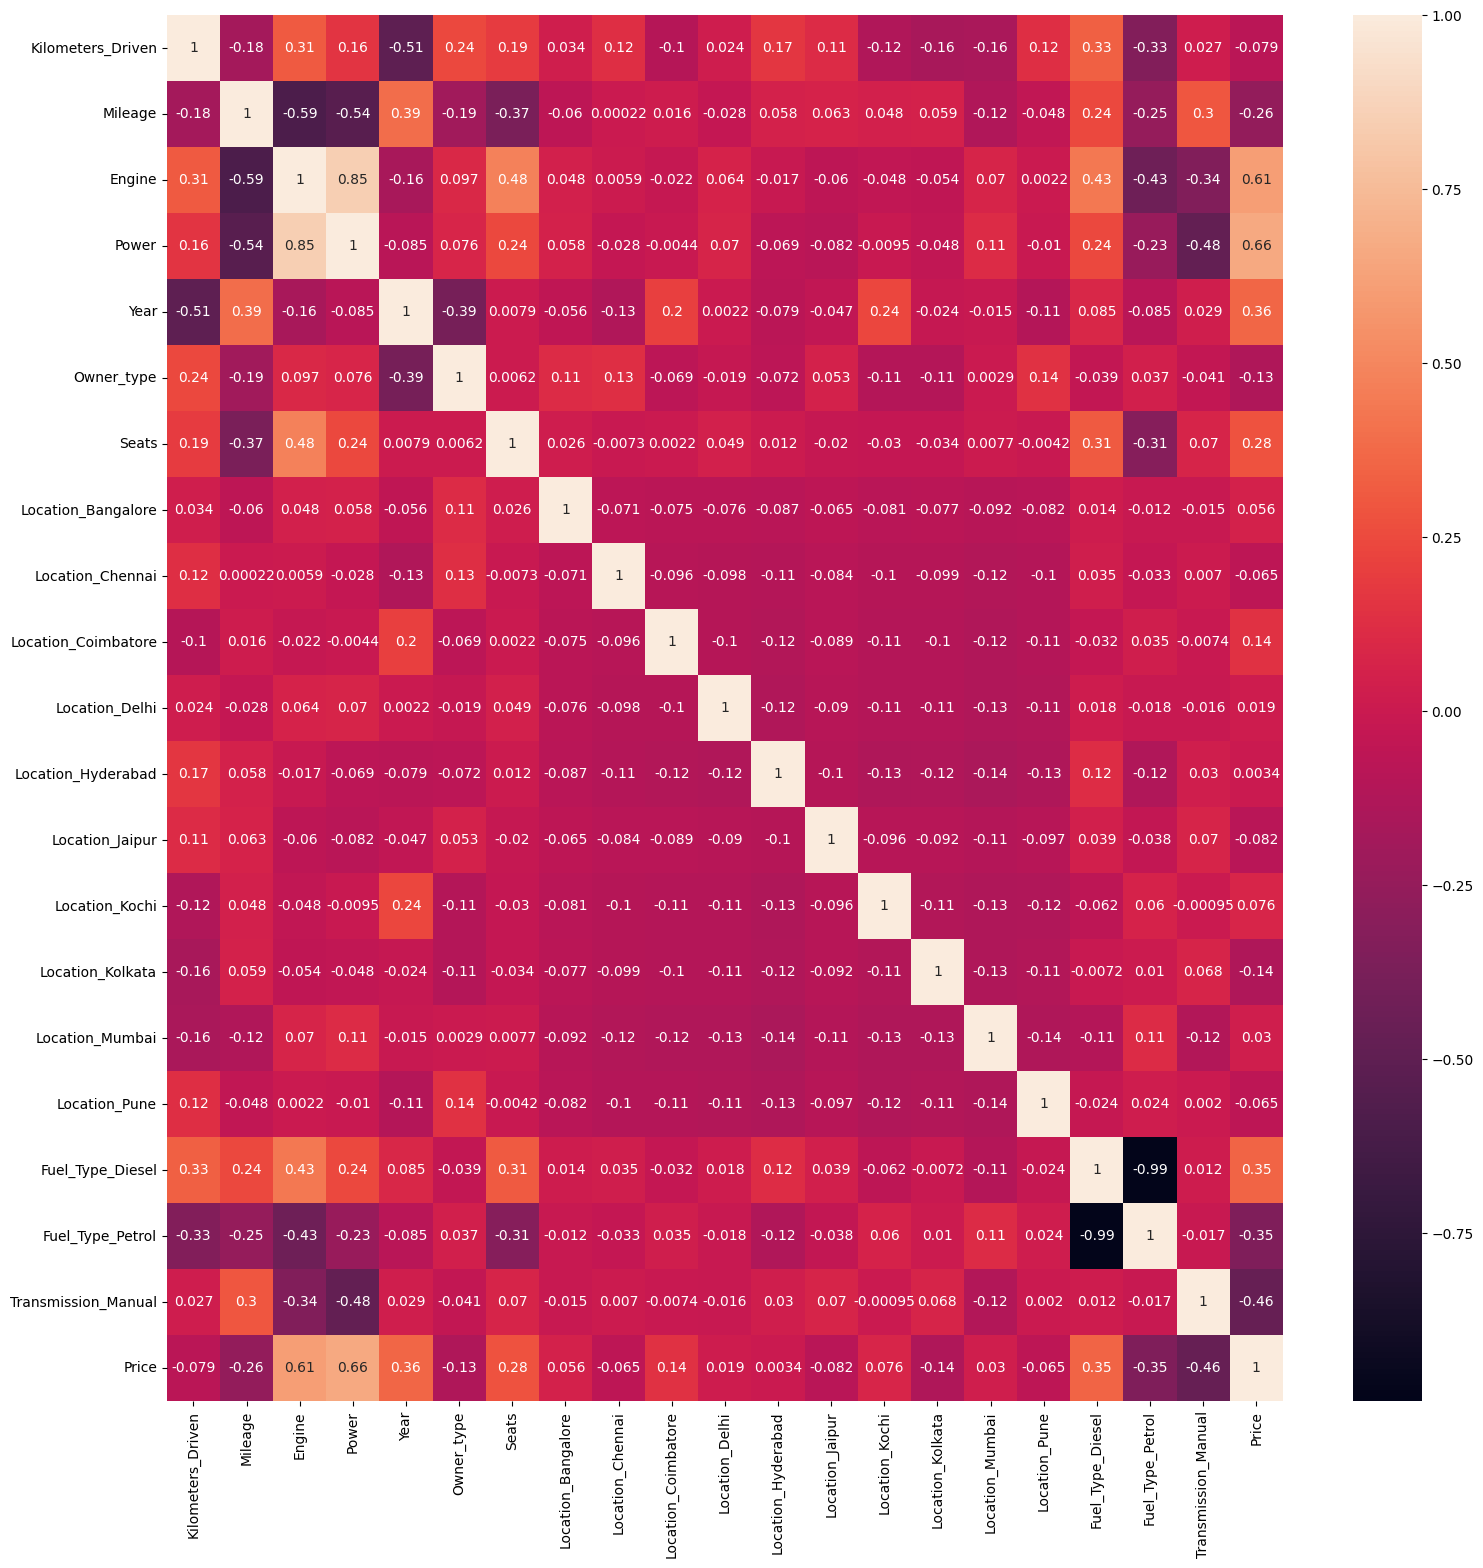

In [619]:
plt.figure(figsize=(18,18))
sns.heatmap(model_df[:-1].corr(),annot = True)
plt.show()

In [620]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
c=correlation(model_df,0.9)
print(c)

{'Fuel_Type_Petrol'}


In [621]:
non_mc_model = model_df.drop(['Fuel_Type_Petrol'], axis=1)
'''non_mc_model = model_df.drop(model_df[['Fuel_Type_Petrol','New_Price']],axis=1,inplace=False)'''
X_non_mc = non_mc_model.iloc[:,:-1]


*but this method doesn't ensure that all other var are free from mc therefore further need to ensure from VIF*

In [622]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X_non_mc.columns
vif_data["VIF"] = [variance_inflation_factor(X_non_mc.values, i)
                          for i in range(len(X_non_mc.columns))]

vif_data.sort_values('VIF', ascending=False)

,feature,VIF
4,Year,31.661993
6,Seats,30.490883
2,Engine,7.770736
18,Transmission_Manual,6.969094
17,Fuel_Type_Diesel,5.849088
3,Power,5.006162
1,Mileage,3.769591
15,Location_Mumbai,3.379996
13,Location_Kochi,3.252522
11,Location_Hyderabad,3.215499


*we can clearly see that year and seats are still generating multicollinearity*

In [623]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_non_mc, Y, test_size=0.2, random_state=30)

# *Homoskedasticity*

In [654]:
X_ols = np.append(arr=np.ones((4972,1)).astype(int),values=X_non_mc ,axis=1)
regressor_OLS = sm.OLS(endog=Y,exog=X_ols)
regressor_OLS = regressor_OLS.fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     660.3
Date:                Thu, 28 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:58:12   Log-Likelihood:                -10786.
No. Observations:                4972   AIC:                         2.161e+04
Df Residuals:                    4952   BIC:                         2.174e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1274      0.283     -0.449      0.6

In [625]:
from statsmodels.stats.diagnostic import het_white

In [626]:
residuals = regressor_OLS.resid

In [627]:
squared_residuals = residuals ** 2

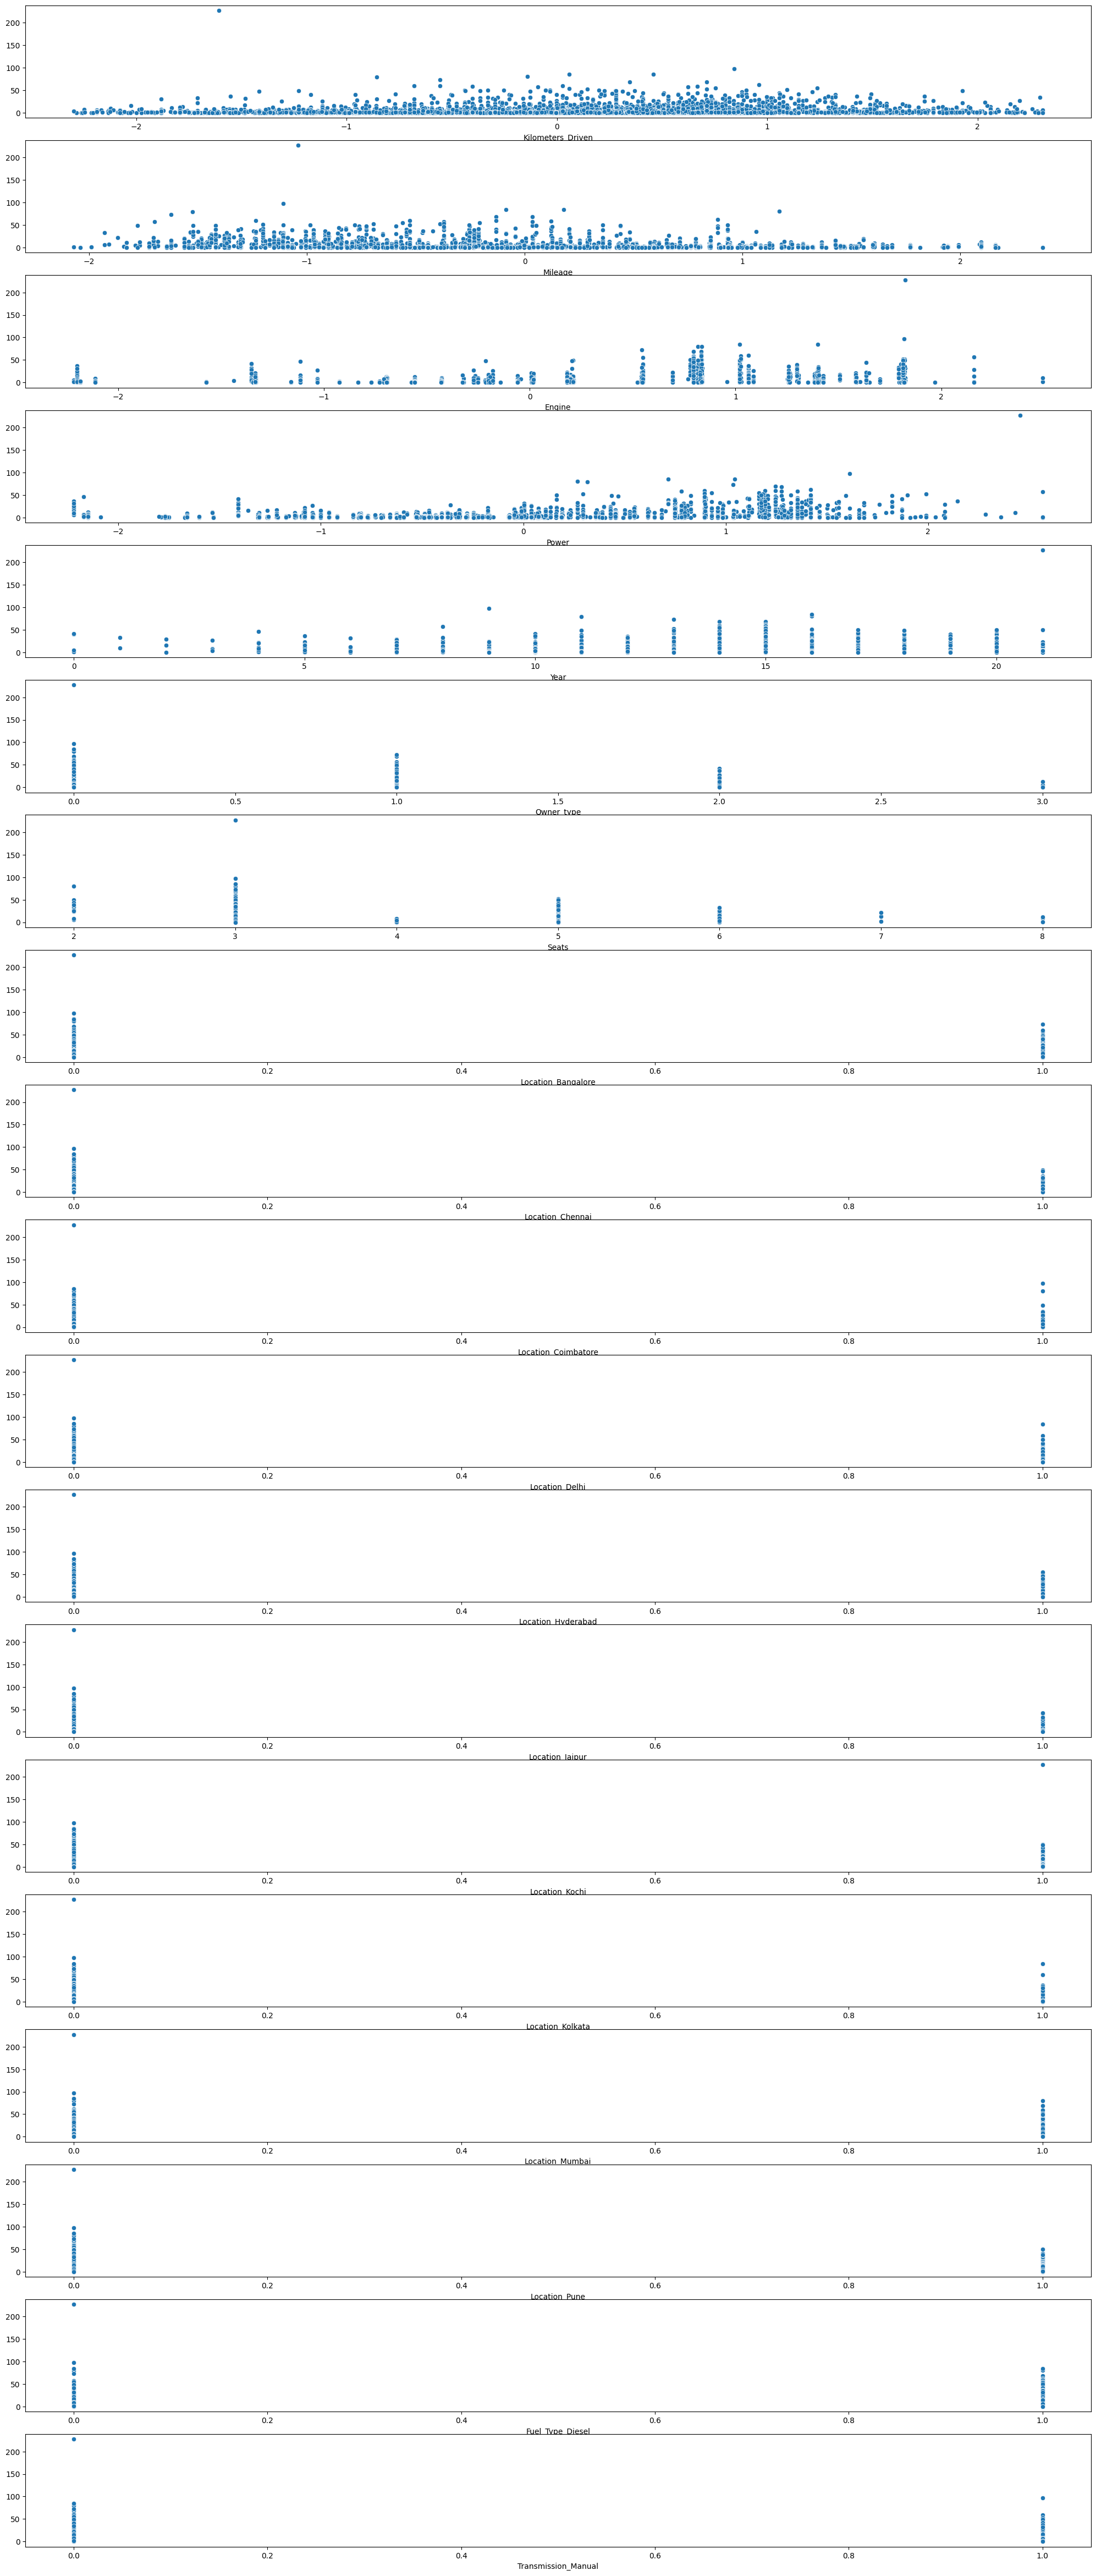

In [661]:
fig , axes = plt.subplots(nrows=19,figsize=(25,60))
for i,j in zip(X_non_mc.columns,range(19)):
  sns.scatterplot(x=X_non_mc[i],y=squared_residuals,ax=axes[j])

*it is homoscedastic as:*

*   *observations are equally spreaded*
*   *and the variance in residuals are also in same range*

# ***Model Implementation***

In [629]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()

In [653]:
lr.fit(Xtrain,Ytrain)


LinearRegression()

In [631]:
Y_pred = lr.predict(Xtest)
Y_pred_train = lr.predict(Xtrain)

In [632]:
print("Test accuracy:", r2_score(Ytest,Y_pred))
print("Train accuracy:", r2_score(Ytrain,Y_pred_train))

Test accuracy: 0.7103243424723957
Train accuracy: 0.7180714600127966


In [633]:
n=995
p=19
adjusted_rsquared = 1 - ((1 - r2_score(Ytest,Y_pred)) * (n - 1) / (n - p - 1))
print(adjusted_rsquared)

0.7046793809410885


In [659]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=50)
ridge_model.fit(Xtrain, Ytrain)
Ypred = ridge_model.predict(Xtest)
Ypredtrain = ridge_model.predict(Xtrain)

In [660]:
print("Test accuracy:", r2_score(Ytest,Ypred))
print("Train accuracy:", r2_score(Ytrain,Ypredtrain))

Test accuracy: 0.7120030718285749
Train accuracy: 0.7166468650798085
